<a href="https://colab.research.google.com/github/calzateu/Numerical_Analysis/blob/main/code/Sentiment_analysis/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd

In [118]:
data = pd.read_csv('Dataset-with-sentiments.csv')

In [119]:
data.head(5)

,Video ID,Comment ID,comments,Likes,polarity,pol_cat,stop_comments
0,MwpMEbgC7DA,UgzSCaG-BeNW0LkW2px4AaABAg,that s beautiful,0,0.850000,1,beautiful
1,MwpMEbgC7DA,Ugw6J6RLt2VGaKMAz4h4AaABAg,imagine being able to listen to this so...,176,0.375000,1,imagine able listen song like first time ever ...
2,MwpMEbgC7DA,UgwyFvqt1jZGR1l32sl4AaABAg,i've memorized this song more than math ...,4,0.333333,1,'ve memorized song math equations think song m...
3,MwpMEbgC7DA,UgzzG2fg2Aq8HjJAQUB4AaABAg,every time i listen to this reminds me ...,0,0.850000,1,every time listen reminds tvd elena damon rain...
4,MwpMEbgC7DA,Ugwx9ephHmJlIN8Sc614AaABAg,forever my cry song,2,0.000000,0,forever cry song


In [120]:
sum(data['stop_comments'].isnull())

0

In [121]:
data = data[data['stop_comments'].notnull()]

In [122]:
sum(data['stop_comments'].isnull())

0

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [125]:
X_train.shape

(5794,)

In [126]:
X_test.shape

(1449,)

In [127]:
data['pol_cat'].value_counts()

1    3715
0    3528
Name: pol_cat, dtype: int64

## **Gonna apply Naive Bayes**

In [128]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
#vect = CountVectorizer()
#tf_train = vect.fit_transform(X_train)
#tf_test = vect.transform(X_test)

vect = TfidfVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [129]:
tf_train

<5794x8118 sparse matrix of type '<class 'numpy.float64'>'
	with 69820 stored elements in Compressed Sparse Row format>

In [130]:
tf_train.shape

(5794, 8118)

In [131]:
#print(vect.vocabulary_)

In [132]:
#vocab = vect.vocabulary_

Aplicando lo de TfidfTransformer mejora considerablemente. Buscar por qué

In [133]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(tf_train, y_train)

**Accuracy score on training dataset**

In [134]:
clf.score(tf_train, y_train)

0.8898860890576459

**Accuracy score on test dataset i.e got from the splitting**

In [135]:
clf.score(tf_test, y_test)

0.772256728778468

**Make predictions on the test dataset i.e. unseen data to the model**

In [136]:
expected = y_test
predicted = clf.predict(tf_test)

**plot confusion matrix for the test dataset**

In [137]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [138]:
pip install mlxtend

[[709  55]
 [275 410]]


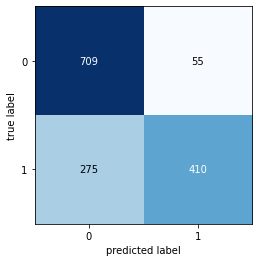

In [139]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [140]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.88      0.60      0.71       685
           1       0.72      0.93      0.81       764

    accuracy                           0.77      1449
   macro avg       0.80      0.76      0.76      1449
weighted avg       0.80      0.77      0.76      1449



**find the F1 score**

In [141]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.7621281464530894

# **Test the model with the comments of the other video**

In [142]:
data_test = pd.read_csv('Video_2/Dataset-with-sentiments.csv')

In [143]:
sum(data_test['stop_comments'].isnull())

1

In [144]:
data_test = data_test[data_test['stop_comments'].notnull()]

In [145]:
sum(data_test['stop_comments'].isnull())

0

In [146]:
data_test['pol_cat'].value_counts()

1    832
0    673
Name: pol_cat, dtype: int64

In [147]:
tf_test = vect.transform(data_test['stop_comments'])

In [148]:
tf_test

<1505x8118 sparse matrix of type '<class 'numpy.float64'>'
	with 13797 stored elements in Compressed Sparse Row format>

In [149]:
tf_test.toarray()[0].sum()

1.2038758500686517

In [150]:
tf_train.toarray().shape

(5794, 8118)

In [151]:
tf_test.toarray().shape

(1505, 8118)

In [152]:
expected = data_test['pol_cat']
predicted = clf.predict(tf_test)

[[798  34]
 [261 412]]


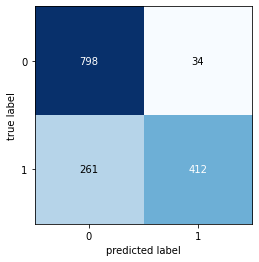

In [153]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [154]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.92      0.61      0.74       673
           1       0.75      0.96      0.84       832

    accuracy                           0.80      1505
   macro avg       0.84      0.79      0.79      1505
weighted avg       0.83      0.80      0.80      1505



In [155]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.7901848226087638

In [156]:
clf.score(tf_test, data_test['pol_cat'])

0.8039867109634552